# TeamBM5

<a id="cont"></a>

## Table of Content

<a href=#one>1. Introduction</a>

<a href=#two>2. Importing Libraries</a>

<a href=#three>3. Comet</a>

<a href=#four>4. Loading and inspecting the data</a>

<a href=#five>5. Exploratory Data Analysis</a>

<a href=#six>6. Data Preprocessing</a>

<a href=#seven>7. Feature Engineering</a>

<a href=#eight>8. Model Training and Evaluation</a>

<a href=#nine>9. Model Testing</a>

<a href=#ten>10. Saving The Model For Kaggle Submission</a>

<a href=#eleven>11. Saving The Models For Streamlit App</a>

<a href=#twelve>12. Conclusion</a>

<a href=#thirteen>13 Recommendations</a>

<a href=#fourteen>14. Reference Links</a>
    

 <a id="one"></a>
## 1. Introduction 
<a href=#cont>Back to Table of Contents</a>

<a id="two"></a>
## 2. Importing Libraries
<a href=#cont>Back to Table of Content

In [39]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.decomposition import PCA
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split
from surprise import accuracy

import warnings
warnings.filterwarnings('ignore')

<a id="three"></a>
## 3. Comet
<a href=#cont>Back to Table of Contents</a>

<a id="four"></a>
## 4. Loading and inspecting the data
<a href=#cont>Back to Table of Contents

Here we load our dataset to the notebook using the pd.read_csv, which loads the csv files to the notebook and then take a look on the shape of the dataset using the .shape attribute, which gives the number of rows and columns, (rows, columns) in this format

In [2]:
train_df = pd.read_csv("dataset/train.csv")

In [3]:
train_df.shape

(10000038, 4)

In [37]:
test_df = pd.read_csv("dataset/test.csv")
test_df.head()

,userId,movieId
0,1,2011
1,1,4144
2,1,5767
3,1,6711
4,1,7318


In [5]:
test_df.shape

(5000019, 2)

In [6]:
tags_df = pd.read_csv("dataset/tags.csv")

In [7]:
tags_df.shape

(1093360, 4)

In [8]:
genome_scores_df = pd.read_csv("dataset/genome_scores.csv")

In [9]:
genome_scores_df.shape

(15584448, 3)

In [10]:
genome_tags_df = pd.read_csv("dataset/genome_tags.csv")

In [11]:
genome_tags_df.shape

(1128, 2)

In [12]:
imdb_df = pd.read_csv("dataset/imdb_data.csv")

In [13]:
imdb_df.shape

(27278, 6)

In [14]:
links_df = pd.read_csv("dataset/links.csv")

In [15]:
links_df.shape

(62423, 3)

In [16]:
movies_df = pd.read_csv("dataset/movies.csv")

In [17]:
movies_df.shape

(62423, 3)

<a id="five"></a>
## 5. Exploratory Data Analysis
<a href=#cont>Back to Table of Contents</a>

EDA, or Exploratory Data Analysis, is a fundamental step in the data analysis process that aims to understand the underlying patterns, relationships, and characteristics of a dataset. It involves visualizing and summarizing the data to gain insights, detect patterns, identify outliers, and formulate hypotheses before applying any statistical modeling or machine learning techniques.

EDA serves as a crucial starting point in the data analysis workflow, aiding analysts in making informed decisions about data cleaning, feature selection, and model building to extract meaningful and actionable insights from the data.

## Train data

In [18]:
#This Code prints the tags data that was imported in the loadiing data section
train_df

,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739
2,146790,5459,5.0,1076215539
3,106362,32296,2.0,1423042565
4,9041,366,3.0,833375837
...,...,...,...,...
10000033,136395,99114,5.0,1521235092
10000034,140078,553,3.0,1002580977
10000035,154807,56782,4.0,1227674807
10000036,85805,327,4.0,1479921530


In [34]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000038 entries, 0 to 10000037
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 305.2 MB


In [36]:
train_df['timestamp'] = pd.to_datetime(train_df['timestamp'])
train_df

,userId,movieId,rating,timestamp
0,5163,57669,4.0,1970-01-01 00:00:01.518349992
1,106343,5,4.5,1970-01-01 00:00:01.206238739
2,146790,5459,5.0,1970-01-01 00:00:01.076215539
3,106362,32296,2.0,1970-01-01 00:00:01.423042565
4,9041,366,3.0,1970-01-01 00:00:00.833375837
...,...,...,...,...
10000033,136395,99114,5.0,1970-01-01 00:00:01.521235092
10000034,140078,553,3.0,1970-01-01 00:00:01.002580977
10000035,154807,56782,4.0,1970-01-01 00:00:01.227674807
10000036,85805,327,4.0,1970-01-01 00:00:01.479921530


In [19]:
#let's check how many users do we have
print("There are", train_df["userId"].nunique(), "users")

There are 162541 users


In [20]:
#let's check how many movies do we have
print("We have", train_df["movieId"].nunique(), "movies in our train dataset")

We have 48213 movies in our train dataset


In [21]:
#This code shows us how many rows has a null value.
train_df.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [22]:
#This code returns the list of all the rates in the train dataset
rates = list(train_df['rating'].unique())
print(rates)

[4.0, 4.5, 5.0, 2.0, 3.0, 1.0, 3.5, 2.5, 0.5, 1.5]


The bar graph below present the total number of rates pre rate score. 

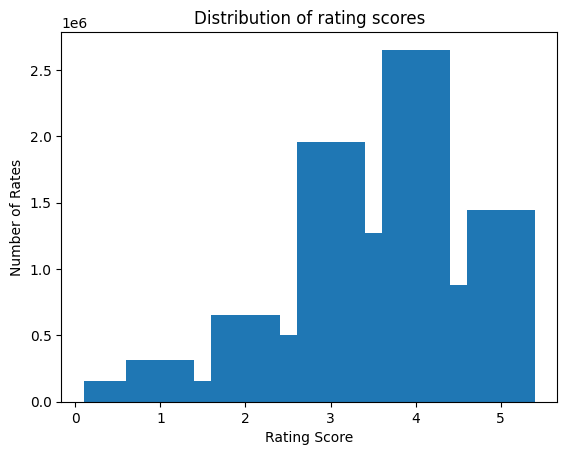

In [23]:
rating_count = train_df["rating"].value_counts() # Distinctly sums all the rates scores in the rating column
plt.bar(rating_count.index, rating_count.values)
plt.xlabel("Rating Score")
plt.ylabel("Number of Rates")
plt.title("Distribution of rating scores")

plt.show()

## Tags data

In [24]:
#This Code prints the tags data that was imported in the loadiing data section
tags_df.head()

,userId,movieId,tag,timestamp
0,3,260,classic,1439472355
1,3,260,sci-fi,1439472256
2,4,1732,dark comedy,1573943598
3,4,1732,great dialogue,1573943604
4,4,7569,so bad it's good,1573943455


In [25]:
#The .info attribute gives you the column, non-null count and datatype summary and some other interesting info
tags_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1093360 entries, 0 to 1093359
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   userId     1093360 non-null  int64 
 1   movieId    1093360 non-null  int64 
 2   tag        1093344 non-null  object
 3   timestamp  1093360 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 33.4+ MB


In [26]:
#This code shows us how many rows has a null value.
tags_df.isnull().sum()

userId        0
movieId       0
tag          16
timestamp     0
dtype: int64

So from the results above we learned that there are 16 null values in the tag column

In [94]:
#lets check how many unique userId do we have in our tags dataset
tags_df["userId"].nunique()

14592

In [80]:
#lets check how many unique movieId do we have in our tags dataset
tags_df["movieId"].nunique()

45251

Below is the wordcloud of our tag column, this wordcloud will present to us what tag appeared the most by print it with the biggest font size

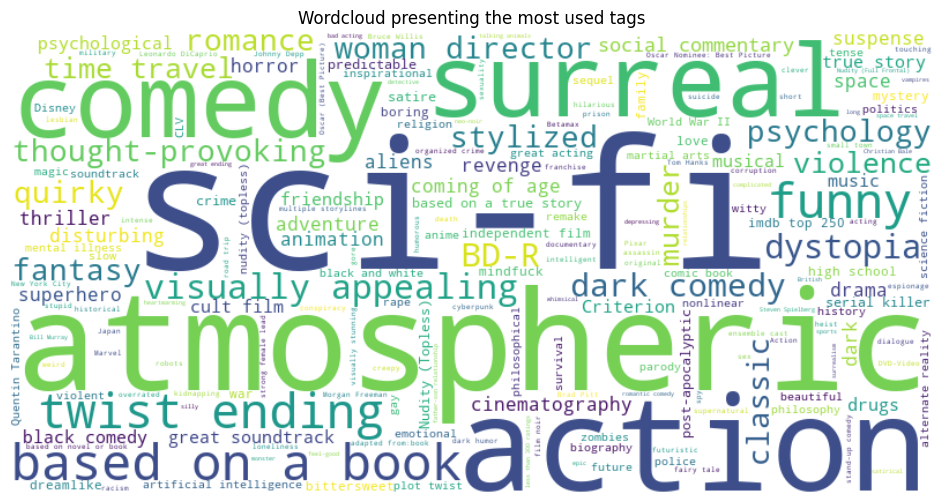

In [89]:
tags_count = pd.Series(tags_df["tag"]).value_counts()

from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(tags_count)

#plot the wordcloud
plt.figure(figsize=(15,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title("Wordcloud presenting the most used tags")
plt.axis("off")
plt.show()



## Genome Scores

In [90]:
#lets check how many unique userId do we have in our tags dataset
genome_scores_df.head()

,movieId,tagId,relevance
0,1,1,0.02875
1,1,2,0.02375
2,1,3,0.06250
3,1,4,0.07575
4,1,5,0.14075


In [91]:
#The .info attribute gives you the column, non-null count and datatype summary and some other interesting info
genome_scores_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15584448 entries, 0 to 15584447
Data columns (total 3 columns):
 #   Column     Dtype  
---  ------     -----  
 0   movieId    int64  
 1   tagId      int64  
 2   relevance  float64
dtypes: float64(1), int64(2)
memory usage: 356.7 MB


In [92]:
#This code shows us how many rows has a null value.
genome_scores_df.isnull().sum()

movieId      0
tagId        0
relevance    0
dtype: int64

In [96]:
#lets check how many unique values do we have in our genome scores dataset
genome_scores_df.nunique()

movieId      13816
tagId         1128
relevance     4000
dtype: int64

## Genome Tags Data

In [97]:
#This Code prints the tags data that was imported in the loadiing data section
genome_tags_df.head()

,tagId,tag
0,1,007
1,2,007 (series)
2,3,18th century
3,4,1920s
4,5,1930s


In [98]:
#The .info attribute gives you the column, non-null count and datatype summary and some other interesting info
genome_tags_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1128 entries, 0 to 1127
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tagId   1128 non-null   int64 
 1   tag     1128 non-null   object
dtypes: int64(1), object(1)
memory usage: 17.8+ KB


## IMDB Data

In [101]:
#This Code prints the tags data that was imported in the loadiing data section
imdb_df.head()

,movieId,title_cast,director,runtime,budget,plot_keywords
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation
1,2,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,104.0,"$65,000,000",board game|adventurer|fight|game
2,3,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...,Mark Steven Johnson,101.0,"$25,000,000",boat|lake|neighbor|rivalry
3,4,Whitney Houston|Angela Bassett|Loretta Devine|...,Terry McMillan,124.0,"$16,000,000",black american|husband wife relationship|betra...
4,5,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,106.0,"$30,000,000",fatherhood|doberman|dog|mansion


In [102]:
#The .info attribute gives you the column, non-null count and datatype summary and some other interesting info
imdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27278 entries, 0 to 27277
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movieId        27278 non-null  int64  
 1   title_cast     17210 non-null  object 
 2   director       17404 non-null  object 
 3   runtime        15189 non-null  float64
 4   budget         7906 non-null   object 
 5   plot_keywords  16200 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 1.2+ MB


In [103]:
#This code shows us how many rows has a null value.
imdb_df.isnull().sum()

movieId              0
title_cast       10068
director          9874
runtime          12089
budget           19372
plot_keywords    11078
dtype: int64

In [123]:
#Lets have a quick look on the rows with null values
imdb_df[imdb_df["title_cast"].isnull()]

,movieId,title_cast,director,runtime,budget,plot_keywords
109,111,NaN,NaN,NaN,NaN,NaN
140,142,NaN,NaN,NaN,NaN,NaN
152,154,NaN,NaN,NaN,NaN,NaN
197,199,NaN,NaN,NaN,NaN,NaN
257,260,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
27202,131052,NaN,NaN,NaN,NaN,NaN
27216,131082,NaN,Libby Spears,85.0,NaN,NaN
27226,131102,NaN,NaN,NaN,NaN,NaN
27227,131104,NaN,NaN,NaN,NaN,NaN


From the results above we can see that we have some other rows with null values on most of the columns, we need to do something with these rows.

In [27]:
#Here we create a list of directors and the count of their appearences on the data
directors = imdb_df["director"].value_counts()
directors

director
See full summary       28
Woody Allen            26
Luc Besson             26
Stephen King           24
William Shakespeare    19
                       ..
Zac Stanford            1
Marc Caro               1
Megan Ambuhl Graner     1
Tahmineh Milani         1
Seong-il Cheon          1
Name: count, Length: 11786, dtype: int64

Then we us the list above to plot the wordcloud below.

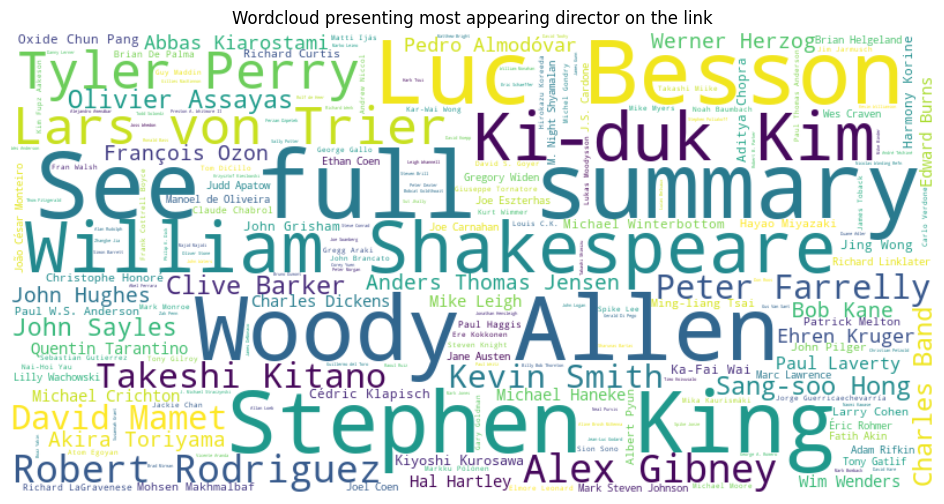

In [28]:
wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(directors)

#plot the wordcloud
plt.figure(figsize=(15,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title("Wordcloud presenting most appearing director on the link")
plt.axis("off")
plt.show()

## Links data

In [29]:
#This Code prints the tags data that was imported in the loadiing data section
links_df.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


## Movies Data

In [30]:
#This Code prints the tags data that was imported in the loadiing data section
movies_df

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
62418,209157,We (2018),Drama
62419,209159,Window of the Soul (2001),Documentary
62420,209163,Bad Poems (2018),Comedy|Drama
62421,209169,A Girl Thing (2001),(no genres listed)


Below we extract the genres from the movies dataset, and also count theie number of appearences.

In [32]:
from collections import Counter

distinct_words = movies_df['genres'].str.cat(sep="|").split("|")
Counter(distinct_words)



Counter({'Adventure': 4145,
         'Animation': 2929,
         'Children': 2935,
         'Comedy': 16870,
         'Fantasy': 2731,
         'Romance': 7719,
         'Drama': 25606,
         'Action': 7348,
         'Crime': 5319,
         'Thriller': 8654,
         'Horror': 5989,
         'Mystery': 2925,
         'Sci-Fi': 3595,
         'IMAX': 195,
         'Documentary': 5605,
         'War': 1874,
         'Musical': 1054,
         'Western': 1399,
         'Film-Noir': 353,
         '(no genres listed)': 5062})

## Investigating columns with null values

We will have to see how much of the columns from the data which were found to have nulls is missing and if these missing values can be fixed by filling them in anyway or if they have to be dropped later on in the data handling phase

In [16]:
#to check the percantage of missing data
director_nulls= imdb_df['director'].isnull().mean()
runtime_nulls= imdb_df['runtime'].isnull().mean()
tmdbId_nulls= links_df['tmdbId'].isnull().mean()
tag_nulls= tags_df['tag'].isnull().mean()
plot_keywords_nulls= imdb_df['plot_keywords'].isnull().mean()
budget_nulls= imdb_df['budget'].isnull().mean()
# print the percentage of missing data
print("Percentage of missing data in column 'director': {:.2f}%".format(director_nulls*100))
print("Percentage of missing data in column 'runtime': {:.2f}%".format(runtime_nulls*100))
print("Percentage of missing data in column 'budget': {:.2f}%".format(budget_nulls*100))
print("Percentage of missing data in column 'plot_keywords': {:.2f}%".format(plot_keywords_nulls*100))
print("Percentage of missing data in column 'tag': {:.2f}%".format(tag_nulls*100))
print("Percentage of missing data in column 'tmdbId': {:.2f}%".format(tmdbId_nulls*100))

Percentage of missing data in column 'director': 36.20%
Percentage of missing data in column 'runtime': 44.32%
Percentage of missing data in column 'budget': 71.02%
Percentage of missing data in column 'plot_keywords': 40.61%
Percentage of missing data in column 'tag': 0.00%
Percentage of missing data in column 'tmdbId': 0.17%


A noticeable chunk of the columns with missing data actually has missing data, with an exception of the 'tag' and the 'tmdbId' column, as it seems the missing values are negligible. This can be seen visually below in the bar chart. This will be addressed in the data handling.

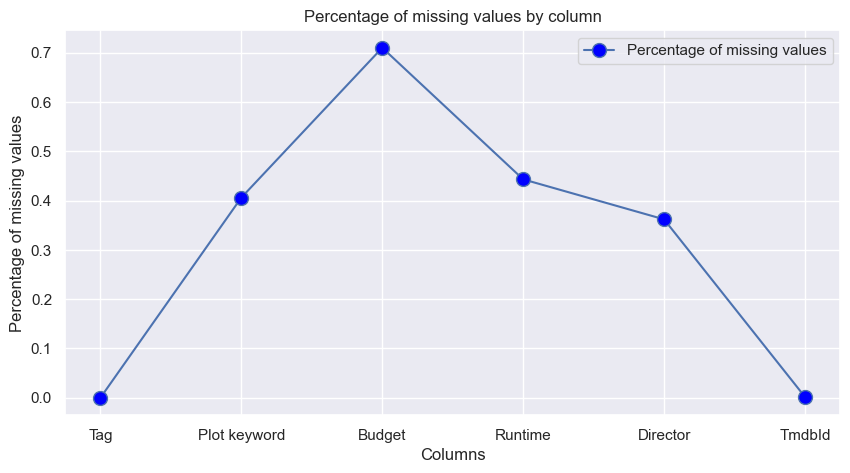

In [25]:
missing_data={'Tag': tag_nulls, 'Plot keyword': plot_keywords_nulls, 'Budget': budget_nulls,
              'Runtime': runtime_nulls, 'Director': director_nulls, 'TmdbId':tmdbId_nulls}
missing_data = pd.DataFrame(list(missing_data.items()),columns= ['Columns', 'Percentage of missing values'])

missing_data.plot(kind='line',x='Columns',y='Percentage of missing values',  
                  marker='o', linestyle='-', markersize=10, markerfacecolor='blue', figsize=(10, 5))
plt.xlabel('Columns')
plt.ylabel('Percentage of missing values')
plt.title('Percentage of missing values by column')
plt.show()

For more visuals, one would perhaps want to see what relationships can be infered from the data sets or what relationships could be interesting to explore. This will require some creative thinking since some key columns such as budget and runtime are missing a significant amount of data

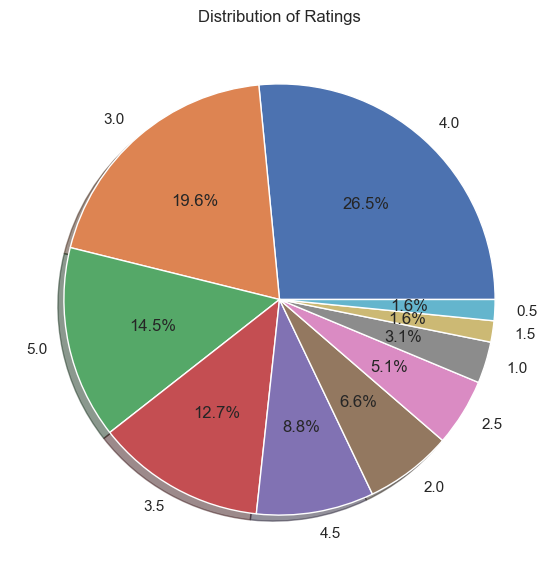

In [23]:
# Visualize the distribution of ratings
sns.set(rc={'figure.figsize':(15,7)})
rating_counts = train_df['rating'].value_counts()
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', shadow=True)
plt.title('Distribution of Ratings')
plt.show()

Our exploration of the datasets does not end there. When movies are being titled, there could be a method in which movie titles are chosen in way that could result in higher rating or better responses from the audience. A word cloud can be used to show the most popular words in titles.

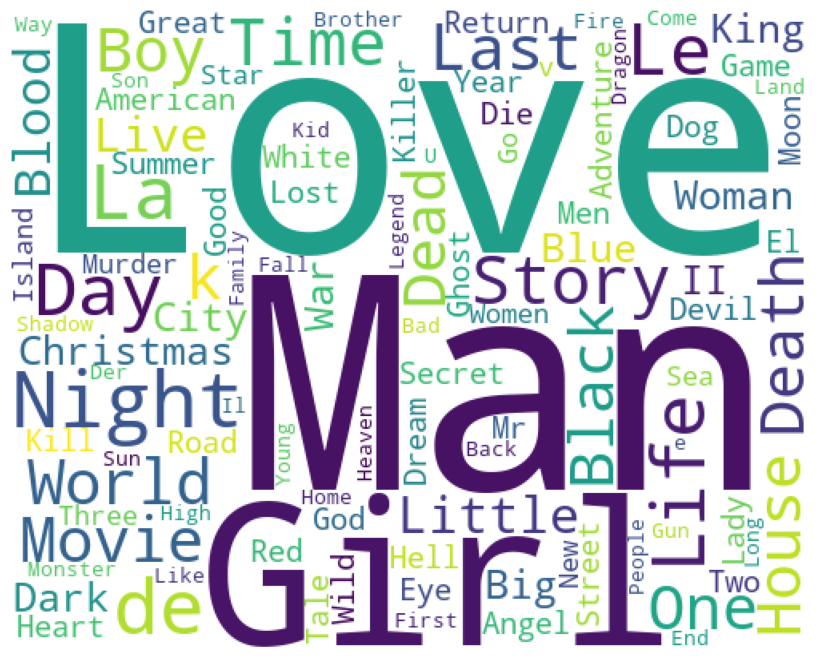

In [68]:
#create a set of english stopwords
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))
#create a list of all the words in the 'title' column
words = ' '.join(movies_df['title'])
#create a wordcloud object
wordcloud = WordCloud(width = 500, height = 400, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(words)

# plot the wordcloud
plt.figure(figsize = (8, 10), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

From the wordcloud it becomes apparent that words like Love, Man and Girl are largly popular when naming a movie. One could, at this point only speculate as to what role naming does to the popularity of a movie. Although it can be said that the name of the movie does play an important role in being as discriptive, eye catching and as relevant as possible so as to attract the intended target market.

With the exploration of the data done as much as possibe without making any changes to the data, it's clear that few relationships can be visualised from the data. To solve this, the Data has to be cleaned and try exploring the data further.

<a id="six"></a>
## 6. Data Preprocessing
<a href=#cont>Back to Table of Contents</a>

From the Exploratory Data Analysis, the columns from the imdb data are lacking a significant amount of information. In this phase of the project, it is important to drop those columns. At this point, it's important to remember that the aim of the project is to build a recommender for both  content based filtering and collaborative based filtering. This will have to kept in mind when changes are made. for instance, for content based filtering, columns such as genre, actors, director and budget might prove vital. hence it would not be adviseable to drop the the columns from the imdb dataframe completely. to deal with the missing values found in the EDA, dropping the rows with empty columns would be more productive so as to keep the information.

In [75]:
#to drop the empty rows
imdb_df.dropna(inplace=True)

Another thing that is visible is the plot keywords and title actor columns have the names mixed up, this might cause issues in the data not being properly displayed. To solve this, spliting the words using the split method would make the information more accessible. However the Imdb dataframe is not the only one with this issue, the column genre from also has the same issue. The same remedy will be applied to it as well.

In [76]:
#splitting the data from imdb data
imdb_df[['plot_keywords', 'title_cast']] = imdb_df[['plot_keywords', 'title_cast']].apply(lambda x: x.str.split('|'))
imdb_df = imdb_df.explode('plot_keywords')
imdb_df = imdb_df.explode('title_cast')

In [77]:
#separating any null values
movies_df = movies_df[~movies_df["genres"].isnull()]
#splitting the genre column
movies_df["genres"] = movies_df["genres"].str.split("|")
movies_df = movies_df.explode("genres")

When looking at the title column from movies, the movie names are structured in a way whereby it is 'movie_name (year of release)'. this might prove inconvinient when searching for a movie, so extracting the year of release and removing it from the data could save time and make the code run more efficiently.

In [78]:
movies_df['title'] = movies_df['title'].str.extract('(.*) \(.*\)', expand=False)

Once these columns have been dealt with, the next step is moving into creating dataframe that would be suitable for the purposes of this project. First, since this is an unsupervised machine learning project, the df_test does not have a rating column, to create it below. Secondly, the timestamp column from df_train does not serve a purpose when it come to getting the ratings, so we'll have to drop it.

In [79]:
test_df['rating'] = test_df.assign(rating=None)['rating'].astype(float)
test_df

,userId,movieId,rating
0,1,2011,NaN
1,1,4144,NaN
2,1,5767,NaN
3,1,6711,NaN
4,1,7318,NaN
...,...,...,...
5000014,162541,4079,NaN
5000015,162541,4467,NaN
5000016,162541,4980,NaN
5000017,162541,5689,NaN


In [80]:
#dropping the timestamp column
train_df = train_df.drop(['timestamp'], axis=1)

We must avoid at all costs having unnecessary data cluttering up the models. Below, we create a new dataframe specifically for the content based filtering. 

In [81]:
#feautures we want to keep
movies_genre = movies_df[['movieId','genres', 'title']]
cast = imdb_df[['movieId', 'title_cast']]
# Group the data by movieId in both dataframes
movies_genre = movies_genre.groupby('movieId').agg({'genres': '|'.join, 'title': 'first'})
cast = cast.groupby('movieId').agg({'title_cast': '|'.join})
# Merge the grouped dataframes on movieId
df_train2 = pd.merge(train_df, movies_genre, on='movieId', how='left')
df_train2 = pd.merge(df_train2, cast, on='movieId', how='left')
df_train2

,userId,movieId,rating,genres,title,title_cast
0,5163,57669,4.0,Comedy|Crime|Drama|Thriller,In Bruges,Elizabeth Berrington|Rudy Blomme|Olivier Bonjo...
1,106343,5,4.5,Comedy,Father of the Bride Part II,Steve Martin|Diane Keaton|Martin Short|Kimberl...
2,146790,5459,5.0,Action|Comedy|Sci-Fi,Men in Black II (a.k.a. MIIB) (a.k.a. MIB 2),Tommy Lee Jones|Will Smith|Rip Torn|Lara Flynn...
3,106362,32296,2.0,Adventure|Comedy|Crime,Miss Congeniality 2: Armed and Fabulous,Sandra Bullock|Regina King|Enrique Murciano|Wi...
4,9041,366,3.0,Drama|Horror|Mystery|Thriller,Wes Craven's New Nightmare (Nightmare on Elm S...,Jeff Davis|Heather Langenkamp|Miko Hughes|Matt...
...,...,...,...,...,...,...
10000033,136395,99114,5.0,Action|Drama|Western,Django Unchained,Jamie Foxx|Christoph Waltz|Leonardo DiCaprio|K...
10000034,140078,553,3.0,Action|Drama|Western,Tombstone,Kurt Russell|Val Kilmer|Sam Elliott|Bill Paxto...
10000035,154807,56782,4.0,Drama|Western,There Will Be Blood,Daniel Day-Lewis|Martin Stringer|Matthew Brade...
10000036,85805,327,4.0,Action|Comedy|Sci-Fi,Tank Girl,Lori Petty|Ice-T|Naomi Watts|Don Harvey|Jeff K...


With the data engineering part done, the exploration of the data can continue.

Exploring the kind of relationships that can be displayed once the data is cleaned. Now features which were not able to be displayed prior to cleaning such as the top rated genres in general can be easily displayed. 

Below the top 20 highly rated genres is displayed.

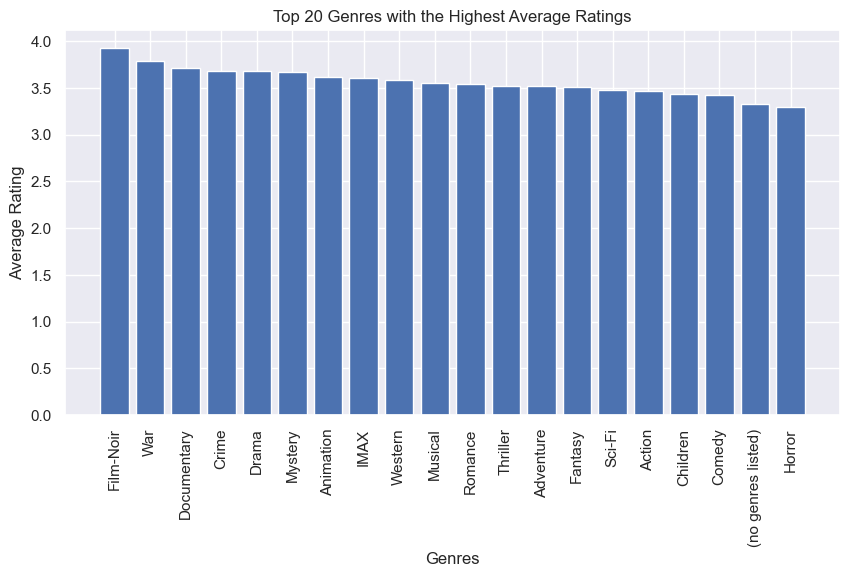

In [83]:
# Join the two dataframes based on the common column movieId
merged_df = pd.merge(train_df, movies_df, on='movieId')
# Group the data by the genres column and calculate the mean rating for each genre
genre_ratings = merged_df.groupby('genres')['rating'].mean().reset_index()
# Sort the data by mean rating in descending order
genre_ratings = genre_ratings.sort_values('rating', ascending=False)
# Keep only the top n genres
n = 20
genre_ratings = genre_ratings.head(n)

# Plot the genres with the highest ratings
plt.figure(figsize=(10, 5))
plt.bar(genre_ratings['genres'], genre_ratings['rating'])
plt.xlabel('Genres')
plt.ylabel('Average Rating')
plt.title(f'Top {n} Genres with the Highest Average Ratings')
plt.xticks(rotation=90)
plt.show()

From the graph, it becomes clear that novelty genres like Film Noir and War are the two most highly rated genres. It could be a play into the rarity and the unusualness of the films. Also seeing documentary, crime and drama in the top 5 most rated genres is quite intersting and could tell what the public is generally interested in. This can be used by executives to see which movies to direct or for companies that stream movies, what kind of movies to include more in their plartfom.

With this said, which movies have on average the highest ratings?
below, the top 20 films with the highest ratings are displayed.

In [84]:
#Join the two dataframes based on the common column movieId
merged_df = pd.merge(train_df, movies_df, on='movieId')
#Group the data by the genres column and calculate the mean rating for each genre
genre_ratings = merged_df.groupby('title')['rating'].mean().reset_index()
#Sort the data by mean rating in descending order
genre_ratings = genre_ratings.sort_values('rating', ascending=False)
#Keep only the top n genres
n = 20
genre_ratings = genre_ratings.head(n)
#Display the genres with the highest ratings as a table
print(genre_ratings[['title', 'rating']])

                                                   title  rating
43666                                           What Now     5.0
22119                                         Lonely Boy     5.0
36260                                   The Big Exchange     5.0
8496                                           Convicted     5.0
5775                                  Bowery at Midnight     5.0
34446                             Storm - Letter of Fire     5.0
22131                               Lonesome Dove Church     5.0
38128                                    The Last Bullet     5.0
38127                     The Last Brickmaker in America     5.0
44949                               You, Me & the Circus     5.0
5786                               Boxers and Ballerinas     5.0
17409  How to Train Your Husband or (How to Pick Your...     5.0
1512             Adventures of Mowgli: Return to Mankind     5.0
38121                                      The Landlords     5.0
8505                     

Seeing the top 20 highest rated movies and genres, it would be interesting to see the directors relationships to the actors. Firstly seeing which directors have worked with the most actors overall, This is a great indicator to show who works well with others. Which in the long term, helps the investor gauge who they would like to invest in when it comes to directors. 

Below the top 25 directors with the most actors worked with is displayed.

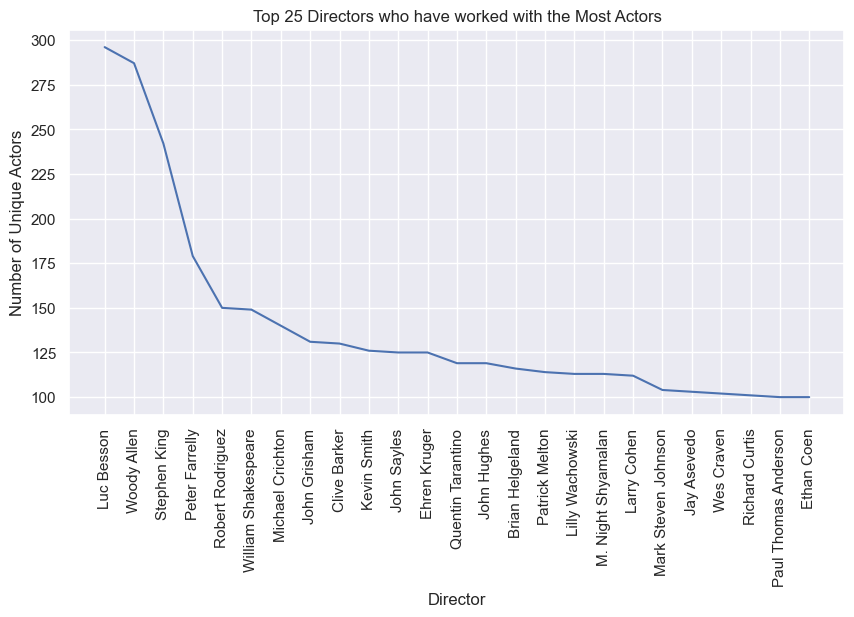

In [86]:
# Create a new dataframe that contains only the director, cast, and movieId columns
df_director_cast = imdb_df[['director', 'title_cast', 'movieId']]
# Group the data by the director and count the number of unique actors they have worked with
director_actor_counts = df_director_cast.groupby(['director'])['title_cast'].nunique().reset_index()
# Sort the data by the number of unique actors in descending order
director_actor_counts = director_actor_counts.sort_values('title_cast', ascending=False)
# Keep only the top 20 directors
top_25 = director_actor_counts.head(25)

# Plot the line graph
plt.figure(figsize=(10, 5))
plt.plot(top_25['director'], top_25['title_cast'])
plt.xlabel('Director')
plt.ylabel('Number of Unique Actors')
plt.title('Top 25 Directors who have worked with the Most Actors')
plt.xticks(rotation=90)
plt.show()

A few interesting insights come up, first to be noted is how the graph almost plateus around 125 actors. This could be due to the level of experience directors have or the willingness of actors to work with the directors. A funny observation is seeing how the list includes directors like classical playwright, actor and poet William Shakespeare. Who died in the year 1616

If that is the case, it might be intersting to see which actors have acted in the highest number of movies. This also helps in seeing who is more popular to work with which is a good sign because making movies is an art but still a business. You want to have the best possible cast, best director and the best production team.

To show the actors with the most movies, we use the following graph:

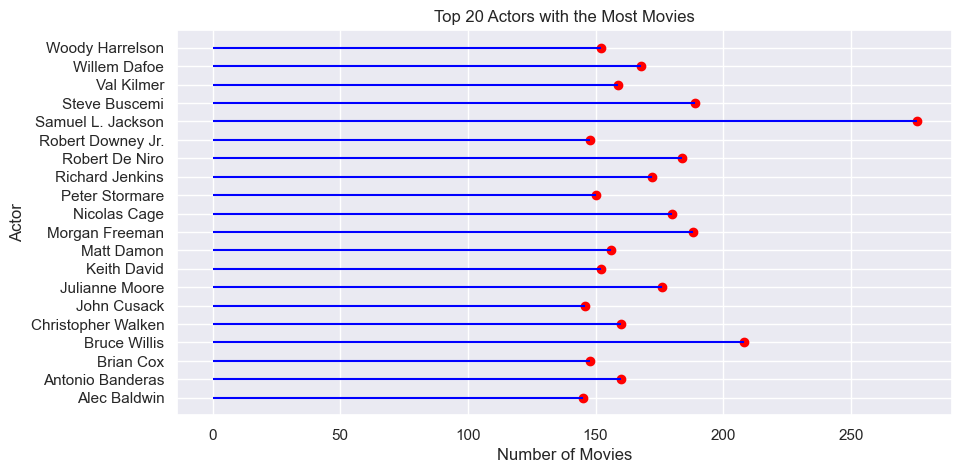

In [88]:
# Count the number of movies each actor appears in
actor_counts = imdb_df['title_cast'].value_counts()
# Only keep the top 20 actors
actor_counts = actor_counts.head(20)
# Sort the actors alphabetically
actor_counts = actor_counts.sort_index()

# Plot the data as a lollipop chart
plt.figure(figsize=(10,5))
plt.hlines(y=actor_counts.index, xmin=0, xmax=actor_counts.values, color='blue')
plt.scatter(x=actor_counts.values, y=actor_counts.index, color='red')
plt.xlabel("Number of Movies")
plt.ylabel("Actor")
plt.title("Top 20 Actors with the Most Movies")
plt.show()

From above, Samuel L. Jackson is the most popular actor  by a huge margin followed by Bruce Willis, who also leads by a sizable margin. This is a good indicator to show the actors experience and value. 

There are plenty of relationships that could be explored and displayed. It can really be done ad nauseam. With the visualisations done already. some key relationships can be drawn. But before closing off this part of the project. Let us look at the directors with the longest runtime. One can compare this with the number of actors a director has worked with. It can also show which directors are given the most creative freedom during filming.

to plot directors with the highest runtimes:

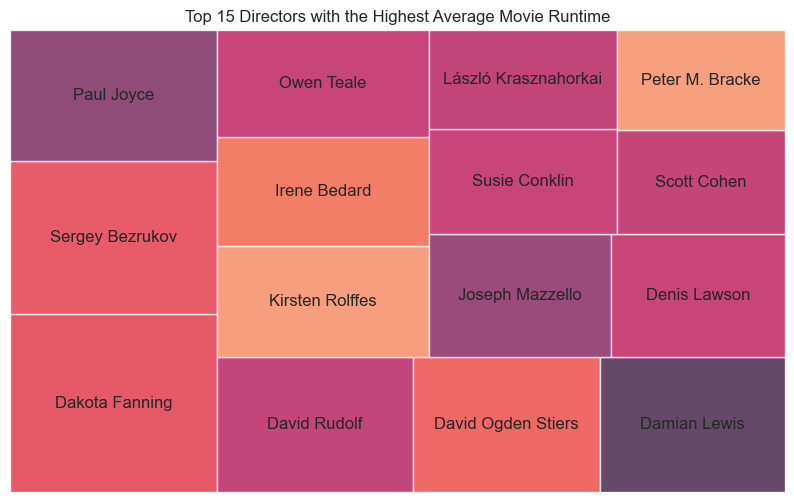

In [73]:
import squarify
import matplotlib.pyplot as plt

# Calculate the average runtime for each director
director_runtime = imdb_df.groupby("director")["runtime"].mean().reset_index()
# Sort the directors by average runtime in descending order
director_runtime = director_runtime.sort_values("runtime", ascending=False)
# Keep only the top 15 directors with the highest average runtime
director_runtime = director_runtime.head(15)

# Plot the Treemap
plt.figure(figsize=(10, 6))
squarify.plot(sizes=director_runtime["runtime"], label=director_runtime["director"], alpha=.8)
plt.axis('off')
plt.title("Top 15 Directors with the Highest Average Movie Runtime")
plt.show()

What is quite interesting to see is how the directors shown here are different from the directors who have worked with the most amount of actors. It could be drawn that a longer runtime is not popular amongst actor. Also runtime does affect production costs, meaning a movie needs to gross more for it to break even. Translating to a higher risk when it comes to the return of investment.

With the exploration of the data done, the project can continue to build the models and fit them

<a id="seven"></a>
## 7. Feature Engineering
<a href=#cont>Back to Table of Contents</a>

<a id="eight"></a>
## 8. Model Training and Evaluation
<a href=#cont>Back to Table of Contents</a>

In [60]:
# Create a Surprise Dataset from the train data
reader = Reader(rating_scale=(1, 5))
train_dataset = Dataset.load_from_df(train_df[['userId', 'movieId', 'rating']], reader)

In [41]:
# Use SVD algorithm
svd = SVD()

# Train the model on the full dataset
trainset = train_dataset.build_full_trainset()
svd.fit(trainset)

In [42]:
# For evaluation, split the dataset into train and test sets
trainset, testset = train_test_split(train_dataset, test_size=0.2)

In [43]:
# Test the model on the test set
predictions = svd.test(testset)

In [44]:
# Calculate RMSE (Root Mean Squared Error) for evaluation (optional)
rmse = accuracy.rmse(predictions)
print("RMSE:", rmse)

RMSE: 0.6638
RMSE: 0.6638345062547365


<a id="nine"></a>
## 9. Model Testing
<a href=#cont>Back to Table of Contents</a>

In [62]:
# Create a Surprise Dataset from the test data
test_df['rating'] = 0
test_dataset = Dataset.load_from_df(test_df[['userId', 'movieId', "rating"]], reader)

In [63]:
# Build testset
testset = test_dataset.build_full_trainset().build_testset()

In [64]:
# Make predictions on the test data
test_predictions = svd.test(testset)

<a id="ten"></a>
## 10. Saving Model for Kaggle Submission
<a href=#cont>Back to Table of Contents</a>

In [71]:
sample = pd.read_csv("Dataset/sample_submission.csv")
sample.head()

,Id,rating
0,1_2011,1.0
1,1_4144,1.0
2,1_5767,1.0
3,1_6711,1.0
4,1_7318,1.0


In [87]:
# Extract the predicted ratings from the test_predictions
test_result = pd.DataFrame([[pred.uid, pred.iid, pred.est] for pred in test_predictions], columns=['userId', 'movieId', 'rating'])
test_result['Id'] = test_result['userId'].astype(str) + '_' + test_result['movieId'].astype(str)

In [97]:
id_col = test_result.pop('Id')
test_result.insert(1,"Id",id_col)
results=test_result.drop(columns=["userId", "movieId"])
results

,Id,rating
0,1_2011,3.065417
1,1_4144,4.303581
2,1_5767,3.772963
3,1_6711,4.156721
4,1_7318,3.187977
...,...,...
5000014,162541_4079,3.302140
5000015,162541_4467,3.642702
5000016,162541_4980,2.611519
5000017,162541_5689,2.803516


In [98]:
# Save the test result to a CSV file
results.to_csv('test_result.csv', index=False)

<a id="eleven"></a>
## 11. Saving Model for Streamlit App
<a href=#cont>Back to Table of Contents</a>

<a id="twelve"></a>
## 12. Conclusion
<a href=#cont>Back to Table of Contents</a>

<a id="thirteen"></a>
## 13. Recommendations
<a href=#cont>Back to Table of Contents</a>

<a id="fourteen"></a>
## 14. Reference Links
<a href=#cont>Back to Table of Contents</a>